# P01

In [1]:
section_fig_main_title = 'P01_'

In [2]:
!which python

/Users/amin/miniconda3/bin/python


In [3]:
import sys
print(sys.executable)


/Users/amin/anaconda3/bin/python


In [4]:
import os, sys
import requests
import scipy.stats as stats

from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

from tensorflow import keras

from sklearn.metrics import r2_score
from math import sqrt
import json

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install xgboost

from sklearn.metrics import r2_score,mean_absolute_error

# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from pandas.plotting import autocorrelation_plot
import gif

/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [5]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import tensorflow as tf
print(tf.__version__)

import gif
from tqdm import tqdm

from sklearn import metrics
# import statsmoadels.api as sm

1.13.1


## Read Data 



In [16]:
csv_path = "../Data/Data_ICME_Edited_out_P02_02.csv"
df = pd.read_csv(csv_path, infer_datetime_format=True)


df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [17]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

# Hypothesis Questions

## BDE

Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations. If data are unavailable from SWEPAM (data commence on 10/22/97), observations from the 3-D P instrument on WIND are referred to. "SEP" indicates that an intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined.

[Reference](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(e))

In [33]:
col1 = 'BDE? (e)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'\n', df[col1].unique())

df[col1].nunique()

num of uniq BDE? (e) 
 ['N' 'Y' '...' 'SEP']


4

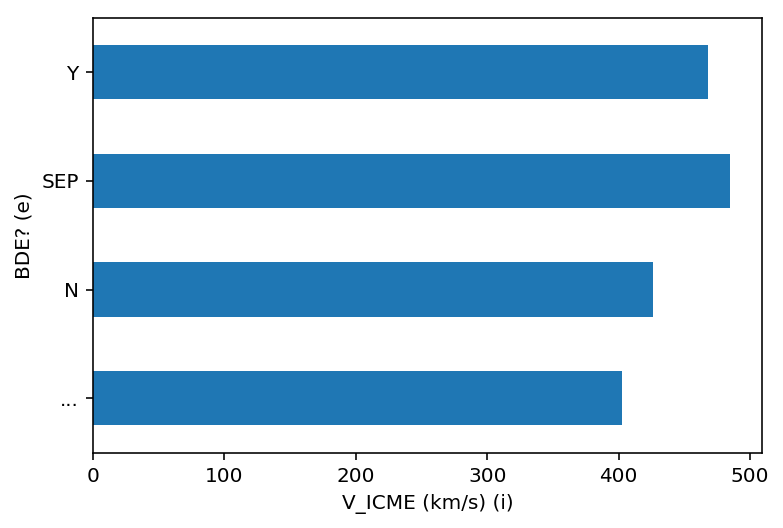

In [19]:
target_grp = df.groupby([col1])

sub_df = target_grp[col2_numer]
target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

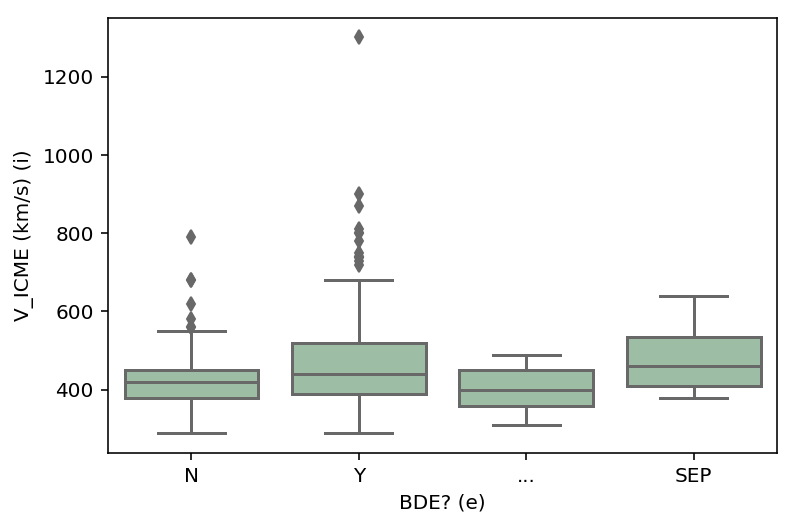

In [20]:
# https://www.reneshbedre.com/blog/anova.html
ax = sns.boxplot(x=col1, y=col2_numer, data=df, color='#99c2a2')
# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.show()

In [21]:
ICME_V_BDE_Y = df[df['BDE? (e)'] == 'Y']['V_ICME (km/s) (i)']
ICME_V_BDE_N = df[df['BDE? (e)'] == 'N']['V_ICME (km/s) (i)']
ICME_V_BDE_SEP = df[df['BDE? (e)'] == 'SEP']['V_ICME (km/s) (i)']

In [22]:
print(ICME_V_BDE_Y.mean())
print(ICME_V_BDE_N.mean())
print(ICME_V_BDE_SEP.mean())

468.2369942196532
426.02649006622516
485.0


From the above plot, it seems that I can infer that the solar speed for those data that there is evidence of bi-directional suprathermal electron (Y) is higher in average compared to those that there no evidence reported. is a difference in average solar wind speed observed from data statistically significant?


<span style="color:gray">
    
H0: Nothing extraordinary going on! The average solar wind speed is constant whether there are Bidirectional suprathermal Electron strahls happen or Not.

</span>


<span style="color:blue">
Ha: Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen!
</span>

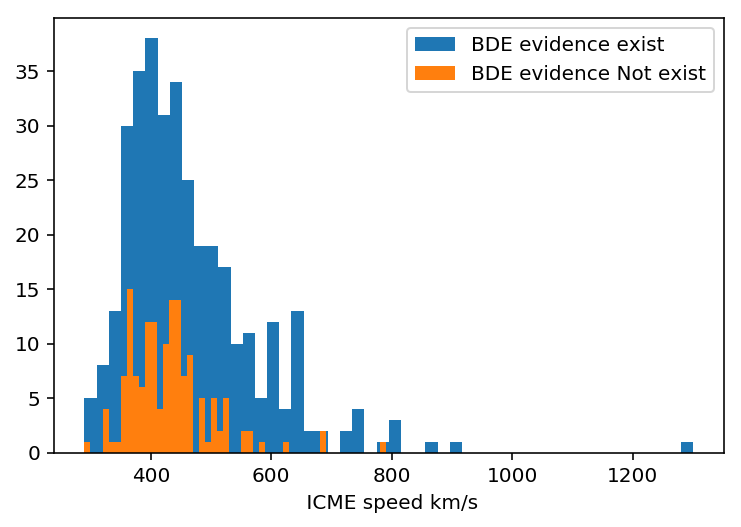

In [23]:
plt.hist(ICME_V_BDE_Y, bins=50, label='BDE evidence exist')
plt.hist(ICME_V_BDE_N, bins=50, label='BDE evidence Not exist')
plt.xlabel(' ICME speed km/s')
plt.legend()
plt.savefig('../Figures/Statistical_Analysis_H0_1.png')
plt.show()

In [27]:
# stats.ttest_1samp(a = ICME_V_BDE_Y ,popmean=ICME_V_BDE_N.mean())

I have two samples so I use two sample t-test (t test independent).

In [26]:
stats.ttest_ind(a = ICME_V_BDE_Y,
                b = ICME_V_BDE_N)

Ttest_indResult(statistic=4.231118622668038, pvalue=2.771368873951386e-05)

The p-value is less than 0.05 therefore we can reject the null hypothesis (H0) and accept that there is a significant difference between the solar storm speed (ICME speed) when there is evidence of BDE with when there is no BDE evidence. In another word, the H1 is correct.

<span style="color:green">
    
Ha: Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen.

</span>



I see from bar plot that the average ICME speed when intense solar energetic particle event was going on is higher than when there was Bidirectional suprathermal Electron strahls happen. Is this observaition from data statistically sognificant or not? So here is my Null hypothesis: 


<span style="color:gray">
    
H0: The average solar wind speed when Bidirectional suprathermal Electron strahls happen is not different than when intense solar energetic particle event is happening. the observed different is ICME speed is due to error.

</span>


<span style="color:blue">
Ha: The average solar wind speed when Bidirectional suprathermal Electron strahls happen is not equal to when intense solar energetic particle event is happening and it is actually lower.
</span>

I have two independant samples therefore, I use two sample t-test (t test independent).

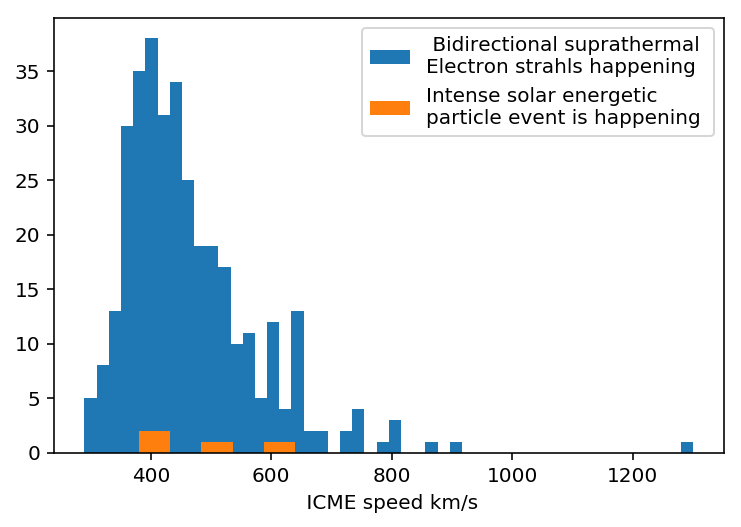

In [31]:
plt.hist(ICME_V_BDE_Y, bins=50, label=' Bidirectional suprathermal \nElectron strahls happening')
plt.hist(ICME_V_BDE_SEP, bins=5, label='Intense solar energetic \nparticle event is happening')
plt.xlabel(' ICME speed km/s')
plt.legend()
plt.savefig('../Figures/Statistical_Analysis_H0_2.png')
plt.show()

In [28]:
stats.ttest_ind(a = ICME_V_BDE_Y,
                b = ICME_V_BDE_SEP)

Ttest_indResult(statistic=-0.2943973492407707, pvalue=0.7686298196205192)

based on p-value from ttest_ind above, the alternative hypothesis is rejected. The observed difference from data is not significant enought to reject the null hypothesis (H0), therefore I stick to H0 and conclude:


<span style="color:green">
    
H0: The average solar wind speed when Bidirectional suprathermal Electron strahls happen is not different than when intense solar energetic particle event is happening. The observed difference in ICME speed is just due to error. Although the data shows that when the intense solar energetic particle event is happening the solar wind speed is higher in average, compare to when Bidirectional suprathermal Electron strahls. However it is not statistically significant.

</span>


Checking out the number of data point with ```SEP``` below, it is seen that we do have just 4 rows of data which is not enougth to come up with a solid conclusion about the average ICME speed.

In [36]:
len(ICME_V_BDE_SEP)

4

# "quality" of the boundary times

The "quality" of the boundary times (`1' indicating the most reliable) based on assessment of the various data sets, including plasma, magnetic field and solar wind composition/charge states. 'W' indicates that the overall ICME signatures are particularly weak.

[Reference](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(e))

In [ ]:
col1 = 'Qual. (g)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'  \n', df[col1].unique())

df[col1].unique()

target_grp = df.groupby([col1])

target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

In [ ]:
col1 = 'BIF? (f)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'  \n', df[col1].unique())

df[col1].unique()

target_grp = df.groupby([col1])

target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

In [ ]:
col1 = 'B (nT) (k)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'  \n', df[col1].unique())

df[col1].unique()

target_grp = df.groupby([col1])

target_grp[col2_numer].mean().plot.barh()
plt.xlabel(col2_numer)
plt.show()

In [ ]:
df.groupby(['BDE? (e)', 'BIF? (f)']).mean().plot.bar()